<a href="https://colab.research.google.com/github/ttafa/Rock-Paper-Scissors/blob/master/NewClassifierComparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required libraries

In [70]:


import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Experiment configuration options

####This will allows setting of the normalization and vectorizing methods, and will also allow setting a threshold for the number of features used and the size of the corpus dataset


In [71]:


#vectorizing methods
tfidfOn = True
bowOn = False

#normalization method
stemmingOn = False
lemmantizeOn = False

#number of features 
featurecount ='all'




# Helper functions


In [72]:


def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1', usecols=cols) 
    return dataset

def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

def getsentimentlabel(sentival):
    
    if sentival > 0:
        return "Positive"
    elif sentival < 0:
        return "Negative"
    else:
        return "Neutral"

#vectorizing method
def getVecMethod():

  if tfidfOn == True:
    return "(TF-IDF)"

  elif bowOn == True:
    return "(BOW)"

  else:
    return "(Not specified)"

#normalization method
def getNormMethod():

  if stemmingOn == True:
    return "(Stemming) - ({} features)".format(featurecount)

  elif lemmantizeOn == True:
    return "(Lemmantize)- ({} features)".format(featurecount)

  else:
    return "(No normalisation)- ({} features)".format(featurecount)


# Preprocessing function

In [73]:

def preprocess_text(tweet, flag_stem=False, flag_lem=False):
    tweet = tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove RT
    tweet = re.sub(r'\brt\b', '', tweet)
    # Remove ascii characters
    string_encode = tweet.encode("ascii", "ignore")
    tweet = string_encode.decode()

    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    tokenized_tweet = [w for w in tweet_tokens if not w in stop_words]
    
    if flag_stem == True:
      #stemming
      ps = PorterStemmer()
      tokenized_tweet = [ps.stem(w) for w in tokenized_tweet]

    if flag_lem == True:
      #lammentizing
      lemmatizer = WordNetLemmatizer()
      tokenized_tweet = [lemmatizer.lemmatize(w, pos='a') for w in tokenized_tweet]
    
    return " ".join(tokenized_tweet)

#Define the classifiers to be used

In [74]:


classifiers = [
    MultinomialNB(),
    LogisticRegression(solver='lbfgs'),
    SVC(kernel='linear', probability=True),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier()
    
    ]
  



# Load dataset

### We also remove unwanted columns from dataset

In [75]:

#id,text,sscore,SentimentScore
dataset1 = load_dataset("corona_tweets_2.5K_Ready.csv", ['text','SentimentScore'])
dataset1.tweet=dataset1.text.astype(str)



#p_filter = dataset["SentimentScore"]==0
dataset = dataset1[dataset1["SentimentScore"] != 2]  
# filtering data
#dataset = dataset1.where(p_filter, inplace = True)
  
# display


pd.set_option('display.max_colwidth', None)
#dataset.head()
dataset.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


(1763, 2)

# Preprocess the Tweets


In [76]:


dataset.text = dataset['text'].apply(lambda tweet_text: preprocess_text(tweet_text, flag_stem=stemmingOn, flag_lem=lemmantizeOn))

print("All data shape: {}".format(dataset.shape))
pd.set_option('display.max_colwidth', None)
dataset.head(6000)

All data shape: (1763, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text,SentimentScore
0,imagine cease amp desisting melee letting people play favorite game middle global pandemic freemelee,1
1,live little town yeah want covid shit go away life go back normal,0
2,paris beautiful avenue champselysees turned bright red christmas season sunday france remains lockdown slow spread coronavirus also see,1
3,rachel maddow delivered emotional monologue partner fell ill covid19 wont necessarily itll person care world bear,0
6,exo xiumin recently started final vacation military return due militarys coronavirus vacation policy carry military status december 6,0
...,...,...
2541,goodnight got quarantine buzz cut concert junkies r verge death bitches make earrings people tht sew midnight snackers,1
2544,taken analyzing peoples eyes photos vs mouths adjudge legitimacy clearly covid affected way whatsoever,1
2546,rymanhealthcare 1h21 result rads rescue rym reported weak 1h21 result underlying earnings annuity ebitda significantly vs pcp covid19 related restrictions weighed activity cash recovery capex particularly weak,0
2547,seems perception many people toronto covid19 doesnt go effect 1201 rather lockdown explains shop drop attitude today malls,1


In [77]:
dataset.SentimentScore.value_counts()

1    954
0    809
Name: SentimentScore, dtype: int64

# Preparing for Training

####Before training, and even vectorizing, let's split our data into training and testing sets. It's important to do this before doing anything with the data so we have a fresh test set.

####Our test size is 0.2, or 20%. This means that X_test and y_test contains 20% of our data which we reserve for testing.

In [78]:




X = dataset.text
y = dataset.SentimentScore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Vectorizing Training Data

###Vectorizing Data: Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text. We implemented vectorization using tf-idf. There are other techniques as well, such as Bag of Words and N-grams.

####Let's now fit the vectorizer on the training set only and perform the vectorization. It is important to not fit the vectorizer on all of the data since we want a clean test set for evaluating performance. Fitting the vectorizer on everything would result in data leakage, causing unreliable results since the vectorizer shouldn't know about future data.

#####We can fit the vectorizer and transform X_train in one step:

In [79]:


if bowOn == True:
  vect = CountVectorizer( binary=True)#, max_features=featurecount)

elif tfidfOn == True:
  vect = TfidfVectorizer(binary=True, ngram_range=(1,1))#, max_features=featurecount) 

else:
  print("Unable to proceed as no vecorization configuration parameters set")
  exit(0)


X_train_vect = vect.fit_transform(X_train)

print(X_train_vect.shape)
print(vect.vocabulary_)
print(vect.get_feature_names_out().shape)


(1410, 5016)
{'every': 1583, 'performance': 3238, 'pandemic': 3168, 'shown': 3996, 'beautiful': 528, 'korea': 2477, 'gyeongbokgung': 2025, 'national': 2945, 'museum': 2919, 'han': 2036, 'river': 3778, 'hyundai': 2210, 'music': 2921, 'library': 2571, 'vinyl': 4745, 'amp': 335, 'plastic': 3308, 'jamsil': 2391, 'olympic': 3068, 'stadium': 4144, 'etc': 1568, 'name': 2935, 'locations': 2619, 'koreas': 2479, 'greatest': 1985, 'ambassadors': 323, 'made': 2685, 'best': 562, 'memories': 2783, 'lol': 2632, 'thats': 4416, 'crazy': 1116, 'please': 3320, 'say': 3858, 'prayer': 3374, 'son': 4086, 'whose': 4889, 'covid': 1087, 'symptoms': 4332, 'gotten': 1961, 'worse': 4949, 'tonight': 4491, 'covid19': 1088, 'covidsymptoms': 1107, 'dont': 1399, 'go': 1942, 'restaurants': 3724, 'unlike': 4671, 'governor': 1968, 'new': 2981, 'jersey': 2399, 'private': 3426, 'chef': 840, 'miss': 2848, 'really': 3582, 'feel': 1719, 'like': 2585, 'took': 4494, 'living': 2608, 'close': 902, 'granted': 1980, 'wan': 4794, 'n

#Create a WorldCloud from vectorized training data to show the most prominent words


In [80]:
#lets create the wordcloud. 
#vec_weights = [(word, X_train_vect.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
#vec_weights[0:5]

#freqs = [(word, X_train_vect.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
#freqs

#wcVec = WordCloud(width=800,height=400,background_color='black',max_words=1000,collocations=False).fit_words(dict(freqs))
#plt.figure(figsize=(40,30))
#plt.imshow(wcVec, interpolation="bilinear")
#plt.axis("off")
#plt.show()

### Count of total records



In [81]:


counts = dataset.SentimentScore.value_counts()
print(counts)

1    954
0    809
Name: SentimentScore, dtype: int64



### Train records count

In [82]:


uniquetrain, countstrain = np.unique(y_train, return_counts=True)
print(list(zip(uniquetrain, countstrain)))

[(0, 654), (1, 756)]


###Test records count

In [83]:


uniquetest, countstest = np.unique(y_test, return_counts=True)
print(list(zip(uniquetest, countstest)))

[(0, 155), (1, 198)]


#Vectorise the Test data

####We need to use our test set in order to get a good estimate of accuracy.

####Let's vectorize the test set, then use that test set to predict if each test tweet is either positive or negative. Since we're avoiding any data leakage, we are only transforming, not refitting. 




In [84]:


X_test_vect = vect.transform(X_test)




#Training the classifier(s) and displaying the evaluation metrics


Algorithm name MultinomialNB

****Results****

Classification report - MultinomialNB - (TF-IDF) - (No normalisation)- (all features) 
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       155
           1       0.80      0.94      0.86       198

    accuracy                           0.83       353
   macro avg       0.85      0.82      0.82       353
weighted avg       0.84      0.83      0.83       353


Metrics report - MultinomialNB - (TF-IDF) - (No normalisation)- (all features) 
Accuracy: 83.29%
F1 Score: 86.37%
Precision Score: 79.57%
Recall Score: 94.44%

Confusion Matrix:
 [[107  48]
 [ 11 187]]



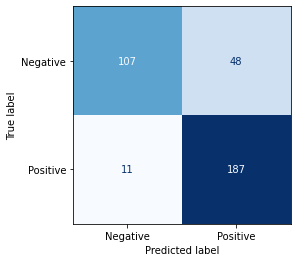



Algorithm name LogisticRegression

****Results****

Classification report - LogisticRegression - (TF-IDF) - (No normalisation)- (all features) 
              precision    recall  f1-score   support

           0       0.98      0.63      0.76       155
           1       0.77      0.99      0.87       198

    accuracy                           0.83       353
   macro avg       0.88      0.81      0.82       353
weighted avg       0.86      0.83      0.82       353


Metrics report - LogisticRegression - (TF-IDF) - (No normalisation)- (all features) 
Accuracy: 83.00%
F1 Score: 86.73%
Precision Score: 77.17%
Recall Score: 98.99%

Confusion Matrix:
 [[ 97  58]
 [  2 196]]



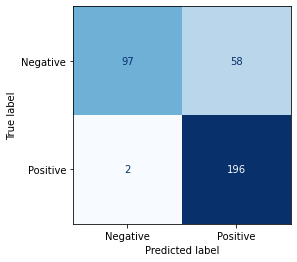



Algorithm name SVC

****Results****

Classification report - SVC - (TF-IDF) - (No normalisation)- (all features) 
              precision    recall  f1-score   support

           0       0.91      0.75      0.83       155
           1       0.83      0.94      0.88       198

    accuracy                           0.86       353
   macro avg       0.87      0.85      0.86       353
weighted avg       0.87      0.86      0.86       353


Metrics report - SVC - (TF-IDF) - (No normalisation)- (all features) 
Accuracy: 86.12%
F1 Score: 88.42%
Precision Score: 83.11%
Recall Score: 94.44%

Confusion Matrix:
 [[117  38]
 [ 11 187]]



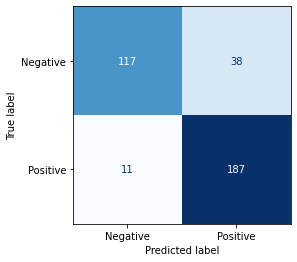



Algorithm name KNeighborsClassifier

****Results****

Classification report - KNeighborsClassifier - (TF-IDF) - (No normalisation)- (all features) 
              precision    recall  f1-score   support

           0       0.85      0.75      0.79       155
           1       0.82      0.89      0.86       198

    accuracy                           0.83       353
   macro avg       0.83      0.82      0.82       353
weighted avg       0.83      0.83      0.83       353


Metrics report - KNeighborsClassifier - (TF-IDF) - (No normalisation)- (all features) 
Accuracy: 83.00%
F1 Score: 85.51%
Precision Score: 81.94%
Recall Score: 89.39%

Confusion Matrix:
 [[116  39]
 [ 21 177]]



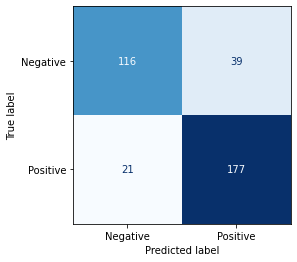



Algorithm name DecisionTreeClassifier

****Results****

Classification report - DecisionTreeClassifier - (TF-IDF) - (No normalisation)- (all features) 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       155
           1       0.82      0.83      0.83       198

    accuracy                           0.80       353
   macro avg       0.80      0.80      0.80       353
weighted avg       0.80      0.80      0.80       353


Metrics report - DecisionTreeClassifier - (TF-IDF) - (No normalisation)- (all features) 
Accuracy: 80.45%
F1 Score: 82.71%
Precision Score: 82.09%
Recall Score: 83.33%

Confusion Matrix:
 [[119  36]
 [ 33 165]]



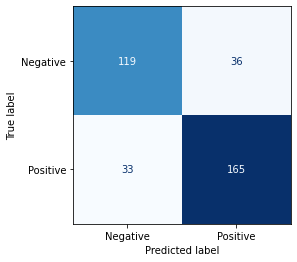

In [85]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "F1", "Precision", "Recall"]
log = pd.DataFrame(columns=log_cols)
log2 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_vect, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print("")
    print("Algorithm name {}".format(name))
    print("")
    print('****Results****')
    train_predictions = clf.predict(X_test_vect)    
    cm = confusion_matrix(y_test, train_predictions)

    acc_score = accuracy_score(y_test, train_predictions) * 100
    f_score = f1_score(y_test, train_predictions) * 100
    pr_score = precision_score(y_test, train_predictions) * 100
    rc_score = recall_score(y_test, train_predictions) * 100
    #print("Accuracy: {:.4%}".format(acc))





    
    print("")

    print("Classification report - {} - {} - {} ".format(name,getVecMethod(), getNormMethod()))
    print(classification_report(y_test, train_predictions))

    print("")

    print("Metrics report - {} - {} - {} ".format(name,getVecMethod(), getNormMethod()))
    print("Accuracy: {:.2f}%".format(acc_score))
    print("F1 Score: {:.2f}%".format(f_score))
    print("Precision Score: {:.2f}%".format(pr_score))
    print("Recall Score: {:.2f}%".format(rc_score))

    print("")

    print("Confusion Matrix:\n", cm)

    print("")

    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
    cm_disp.plot(colorbar=False,cmap=plt.cm.Blues)
    plt.show()



        
    #train_predictions_ll = clf.predict_proba(X_test_vect)
    #ll = log_loss(y_test, train_predictions_ll)
    #print("Log Loss: {}".format(ll))



    #acc_score = "{:.2f}".format(acc_score)
    #f_score = "{:.2f}".format(f_score)
    #pr_score = "{:.2f}".format(pr_score)
    #rc_score = "{:.2f}".format(rc_score)

    log_entry = pd.DataFrame([[name, acc_score, f_score, pr_score, rc_score]], columns=log_cols)
    log = log.append(log_entry)


    acc_score_f = "{:.2f}".format(acc_score)
    f_score_f = "{:.2f}".format(f_score)
    pr_score_f = "{:.2f}".format(pr_score)
    rc_score_f = "{:.2f}".format(rc_score)

    log_entry2 = pd.DataFrame([[name, acc_score_f, f_score_f, pr_score_f, rc_score_f]], columns=log_cols)
    log2 = log2.append(log_entry2)

    print("")
    
print("="*30)


print("")
print("")

#Report all metrics in a table

In [86]:

header_text_table = "Classifier(s) performance - {} - {} ".format(getVecMethod(), getNormMethod())
print(header_text_table)
#print("_"*len(header_text_table))
#log


print("_"*len(header_text_table))
log2

Classifier(s) performance - (TF-IDF) - (No normalisation)- (all features) 
__________________________________________________________________________


,Classifier,Accuracy,F1,Precision,Recall
0,MultinomialNB,83.29,86.37,79.57,94.44
0,LogisticRegression,83.00,86.73,77.17,98.99
0,SVC,86.12,88.42,83.11,94.44
0,KNeighborsClassifier,83.00,85.51,81.94,89.39
0,DecisionTreeClassifier,80.45,82.71,82.09,83.33


In [87]:
log

,Classifier,Accuracy,F1,Precision,Recall
0,MultinomialNB,83.286119,86.374134,79.574468,94.444444
0,LogisticRegression,83.002833,86.725664,77.165354,98.989899
0,SVC,86.118980,88.416076,83.111111,94.444444
0,KNeighborsClassifier,83.002833,85.507246,81.944444,89.393939
0,DecisionTreeClassifier,80.453258,82.706767,82.089552,83.333333


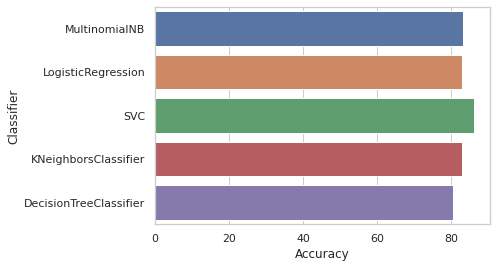

In [88]:



# plot a bar chart
sns.set_theme(style="whitegrid")
sns.barplot(
    y="Classifier", 
    x="Accuracy",
    data=log, 
    estimator=sum, 
    ci=None);



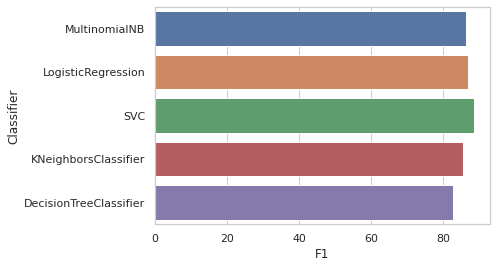

In [89]:
sns.barplot(
    y="Classifier", 
    x="F1", 
    data=log, 
    estimator=sum, 
    ci=None);